In [33]:
#Import Relevant Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import utils

Matplotlib imported as plt: <module 'matplotlib.pyplot' from 'c:\\Users\\kearb\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [34]:
#Read data

file_path = r"Data\Task 1\Lab 9 task 1 - Sheet1.csv"
df = pd.read_csv(file_path)

In [35]:
# #Slice the data for each setting
# The data points used for the calculations are:
# 0.5 uS      2120-2220
# 0.8 uS      2100-2175
# 1.2 uS      2070-2130
# 2.4 uS      2050-2090
# 3.6 uS      2040-2075
# 5.6 uS      2035-206
# 8.0 uS      2020-2035
# 10.4 uS     2010-2030
# 12.0 uS     2020-2045

x_data = df.iloc[2020:2035,0].values
y_data = df.iloc[2020:2035,7].values/180



In [36]:
#Best fit curve

popt, pcov = curve_fit(utils.gaussian, x_data, y_data, p0=[max(y_data), np.mean(x_data), np.std(x_data)])
# popt contains the best-fit parameters: [amplitude, mean, std_dev]

a, mu, sigma = popt

In [37]:
#Print values for best fit

print("Amplitude (a):", a)
print("Mean (mu):", mu)
print("Standard Deviation (sigma):", sigma)
FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma
print("FWHM:", FWHM)

Amplitude (a): 140.1769935965806
Mean (mu): 2026.895892825323
Standard Deviation (sigma): 1.8213798657087978
FWHM: 4.289021817386856


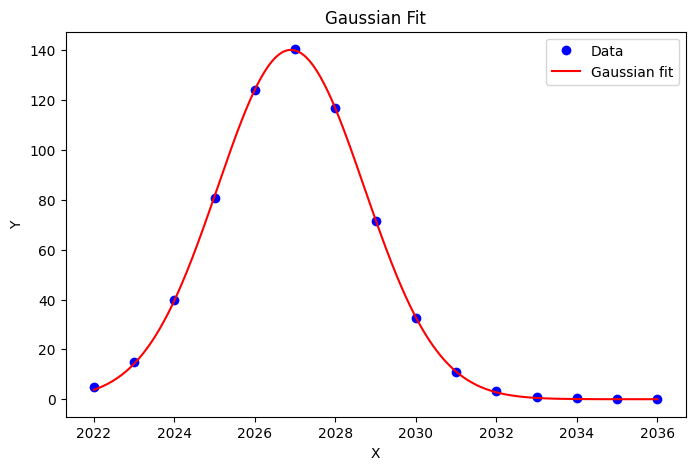

In [38]:
import os
#Create plots for data points and best fit line

# Ensure the directory exists
output_dir = "Plots/Task 1"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = gaussian(x_fit, *popt)

plt.figure(figsize=(8,5))
plt.plot(x_data, y_data, 'bo', label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Gaussian fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Fit')
plt.savefig(f"{output_dir}/Gaussian Fit.png", dpi=300, bbox_inches='tight', pad_inches=0.25)
plt.show()


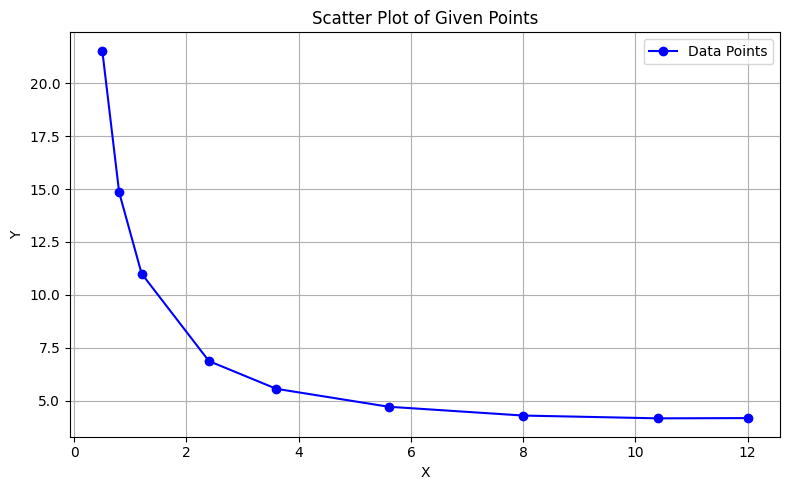

In [39]:
import matplotlib.pyplot as plt

# Define the data points
x_vals = [0.5, 0.8, 1.2, 2.4, 3.6, 5.6, 8.0, 10.4, 12.0]
y_vals = [21.547, 14.8489, 11.005, 6.866, 5.555, 4.706, 4.289, 4.157, 4.169]

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 'bo-', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Given Points')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/FWHM vs time.png", dpi=300, bbox_inches='tight', pad_inches=0.25)
plt.show()
